## Dominant Color Extraction
- Extract k most dominant colors using K Means Clustering algorithm
- Repaint image using just those k colors
- Leads to image segmentation based on the k most dominant colors

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

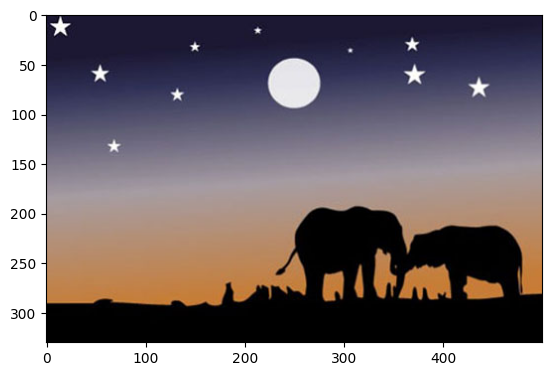

In [5]:
img = cv2.imread('elephant.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [6]:
img.shape

(330, 500, 3)

In [7]:
pixels = img.reshape((330*500,3))
pixels.shape

(165000, 3)

In [12]:
from sklearn.cluster import KMeans
k = 4
km = KMeans(n_clusters=k)

In [13]:
km.fit(pixels)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [14]:
colors = km.cluster_centers_
colors = np.array(colors, dtype='uint8')
colors

array([[ 37,  35,  64],
       [174, 145, 128],
       [ 98,  94, 117],
       [  1,   0,   1]], dtype=uint8)

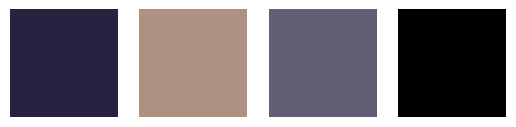

In [16]:
for i,color in enumerate(colors):
    plt.subplot(1, k, i+1)
    plt.axis('off')
    
    swatch = np.zeros((100,100,3), dtype='uint8')
    swatch[:,:,:] = color
    plt.imshow(swatch)

plt.show()

In [17]:
new_img = np.zeros((330*500,3), dtype='uint8')
new_img.shape

(165000, 3)

In [19]:
labels = km.labels_
len(labels)

165000

In [20]:
for i in range(new_img.shape[0]):
    new_img[i] = colors[labels[i]]

In [21]:
new_img = new_img.reshape(img.shape)

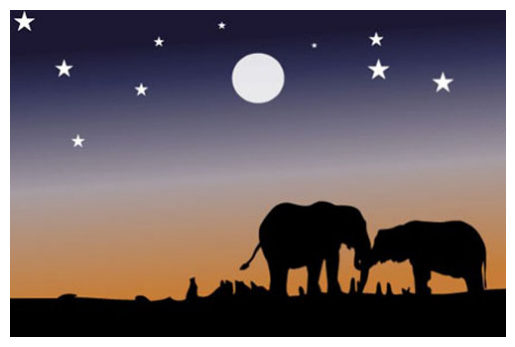

In [25]:
plt.imshow(img)
plt.axis('off')
plt.show()

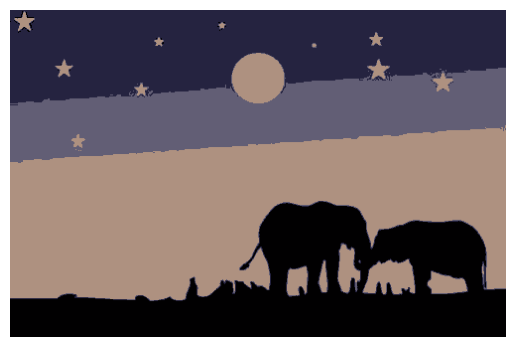

In [24]:
plt.imshow(new_img)
plt.axis('off')
plt.show()